In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
df.head()

,City,Time,PM10_min,PM10_max,PM10_avg,PM2.5_min,PM2.5_max,PM2.5_avg,NO2_min,NO2_max,...,CO_min,CO_max,CO_avg,OZONE_min,OZONE_max,OZONE_avg,Hour,Month,Date,Day
0,Yamunanagar,2020-09-22 14:00:00,78.0,170.0,121.0,59.0,239.0,134.0,14.0,75.0,...,19.0,74.0,22.0,10.0,122.0,32.0,14,9,22-09-2020,1
1,Karnal,2020-09-22 14:00:00,64.0,113.0,91.0,42.0,227.0,111.0,1.0,5.0,...,16.0,44.0,19.0,4.0,43.0,13.0,14,9,22-09-2020,1
2,Ahmedabad,2020-09-22 14:00:00,57.0,93.0,69.0,13.0,89.0,48.0,23.0,72.0,...,10.0,77.0,37.0,4.0,127.0,52.0,14,9,22-09-2020,1
3,Ajmer,2020-09-22 14:00:00,44.0,114.0,80.0,29.0,147.0,65.0,9.0,73.0,...,24.0,82.0,42.0,6.0,83.0,61.0,14,9,22-09-2020,1
4,Alwar,2020-09-22 14:00:00,68.0,95.0,81.0,60.0,81.0,71.0,13.0,28.0,...,15.0,40.0,26.0,5.0,84.0,28.0,14,9,22-09-2020,1


In [4]:
cities = list(set(list(df.City)))
len(cities)

119

In [5]:
locator = Nominatim(user_agent="abcd",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Kohima SUCCESS!
2.Thrissur SUCCESS!
3.Hisar SUCCESS!
4.Katni SUCCESS!
5.Moradabad SUCCESS!
6.Kolkata SUCCESS!
7.Thane SUCCESS!
8.Guwahati SUCCESS!
9.Lucknow SUCCESS!
10.Patiala SUCCESS!
11.Panchkula SUCCESS!
12.Alwar SUCCESS!
13.Vapi SUCCESS!
14.Yamunanagar SUCCESS!
15.Noida SUCCESS!
16.Ankleshwar SUCCESS!
17.Chandigarh SUCCESS!
18.Thiruvananthapuram SUCCESS!
19.Rupnagar SUCCESS!
20.Hajipur SUCCESS!
21.Manesar SUCCESS!
22.Eloor SUCCESS!
23.Ghaziabad SUCCESS!
24.Howrah SUCCESS!
25.Talcher SUCCESS!
26.Ahmedabad SUCCESS!
27.Meerut SUCCESS!
28.Jaipur SUCCESS!
29.Bengaluru SUCCESS!
30.Hapur SUCCESS!
31.Kanpur SUCCESS!
32.Shillong SUCCESS!
33.Chikkamagaluru SUCCESS!
34.Khanna SUCCESS!
35.Agra SUCCESS!
36.Jabalpur SUCCESS!
37.Vijayapura SUCCESS!
38.Sonipat SUCCESS!
39.Ludhiana SUCCESS!
40.Kalaburgi SUCCESS!
41.Faridabad SUCCESS!
42.Sirsa SUCCESS!
43.Gwalior SUCCESS!
44.Bathinda SUCCESS!
45.Ujjain SUCCESS!
46.Palwal SUCCESS!
47.Aurangabad SUCCESS!
48.Hyderabad SUCCESS!
49.Bagalkot SUCCESS!
5

{'Kohima': [25.75, 94.166667],
 'Thrissur': [10.5256264, 76.2132542],
 'Hisar': [29.168807, 75.7461103],
 'Katni': [23.8339621, 80.392456],
 'Moradabad': [28.8638424, 78.80577833091104],
 'Kolkata': [22.54541245, 88.3567751581234],
 'Thane': [19.1943294, 72.9701779],
 'Guwahati': [26.1805978, 91.753943],
 'Lucknow': [26.8381, 80.9346001],
 'Patiala': [30.2090874, 76.3398720856221],
 'Panchkula': [30.616216450000003, 77.04197804321875],
 'Alwar': [27.639077049999997, 76.6144524902045],
 'Vapi': [20.3735482, 72.9084376],
 'Yamunanagar': [30.2112003, 77.28638972360895],
 'Noida': [28.5356329, 77.3910727],
 'Ankleshwar': [21.6293206, 72.9945103],
 'Chandigarh': [30.72984395, 76.78414567016054],
 'Thiruvananthapuram': [8.5241122, 76.9360573],
 'Rupnagar': [31.09168085, 76.5272673916138],
 'Hajipur': [25.7205805, 85.25555961402884],
 'Manesar': [28.32470955, 76.92637867182586],
 'Eloor': [10.06946315, 76.30727493919397],
 'Ghaziabad': [28.711241, 77.4445372],
 'Howrah': [22.5736296, 88.32510

In [6]:
df['Coordinates'] = df.City.map(coord)

In [7]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','SO2_min','SO2_avg','SO2_max']

## PAN-INDIA plotting for the whole data

In [8]:
df_1 = df[cols].copy()

In [9]:
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.000000,6.000000,7.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,5.000000,13.000000,109.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.000000,28.000000,121.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,9.000000,11.000000,12.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.000000,19.000000,29.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,1.000000,3.000000,5.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,1.000000,7.000000,15.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,3.000000,6.000000,10.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,5.714286,7.857143,10.285714


### Taking average for all cities over the period of data collection

In [10]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.0,6.0,7.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,5.0,13.0,109.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.0,28.0,121.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,9.0,11.0,12.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.0,19.0,29.0


In [11]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [12]:
list_dict = []
# 
for city in cities:
    dict_SO2 = {}
    dict_SO2['City'] = city
    dict_SO2['Max'] = df_1.loc[df_1.City == city]['SO2_max'].mean()
    dict_SO2['Avg'] = df_1.loc[df_1.City == city]['SO2_avg'].mean()
    dict_SO2['Min'] = df_1.loc[df_1.City == city]['SO2_min'].mean()
    dict_SO2['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_SO2)
list_dict

[{'City': 'Agra',
  'Max': 100.63888888888889,
  'Avg': 39.80555555555556,
  'Min': 4.180555555555555,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 80.13962264150943,
  'Avg': 30.139622641509433,
  'Min': 5.988679245283019,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 14.355102040816327,
  'Avg': 8.579591836734695,
  'Min': 4.759183673469388,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 28.166037735849056,
  'Avg': 16.264150943396228,
  'Min': 5.064150943396227,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 51.735849056603776,
  'Avg': 21.864150943396226,
  'Min': 8.064150943396227,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 43.37358490566038,
  'Avg': 18.471698113207548,
  'Min': 9.543396226415094,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 40.45564516129032,
  'Avg': 16.907258064516128,
  'Min': 8.270161

In [13]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,100.64,39.81,4.18,"[27.1752554, 78.0098161]"
1,Ahmedabad,80.14,30.14,5.99,"[23.0216238, 72.5797068]"
2,Ajmer,14.36,8.58,4.76,"[26.4691, 74.639]"
3,Alwar,28.17,16.26,5.06,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,51.74,21.86,8.06,"[16.4998534, 81.3300812]"


In [14]:
# df_avg['Latitude'] = df_avg.Coordinates.apply(lambda x : float(x.split(',')[0].split('[')[1]) )
df_avg.describe()

,Max,Avg,Min
count,115.000000,115.000000,115.000000
mean,28.847739,14.165739,7.244870
std,21.815231,9.920368,5.821116
min,2.190000,1.360000,1.000000
25%,11.655000,6.530000,3.280000
50%,25.580000,12.540000,5.860000
75%,39.385000,18.555000,9.670000
max,102.890000,54.200000,37.320000


In [15]:
df_avg

,City,Max,Avg,Min,Coordinates
0,Agra,100.64,39.81,4.18,"[27.1752554, 78.0098161]"
1,Ahmedabad,80.14,30.14,5.99,"[23.0216238, 72.5797068]"
2,Ajmer,14.36,8.58,4.76,"[26.4691, 74.639]"
3,Alwar,28.17,16.26,5.06,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,51.74,21.86,8.06,"[16.4998534, 81.3300812]"
...,...,...,...,...,...
114,Varanasi,NaN,NaN,NaN,"[25.3356491, 83.0076292]"
115,Vatva,62.40,26.53,10.55,"[22.9589978, 72.6297981]"
116,Vijayapura,5.83,3.56,1.46,"[16.666667, 75.916667]"
117,Visakhapatnam,15.17,7.88,1.61,"[17.7231276, 83.3012842]"


### Map functions

In [16]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])
#     df[val+'_rad'] = df[val]/2

In [17]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [18]:
Radius(df_avg,'Avg')

In [19]:
SO2_map = Create_Map()

### Plotting average SO2 levels over the period of data collection

In [20]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 18.55: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(SO2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 12.54:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(SO2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 6.53:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(SO2_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(SO2_map)
        

In [21]:
SO2_map

In [22]:
#SO2 levels
# excellent = 25
# fine = 50
# moderate = 120
# poor = 350

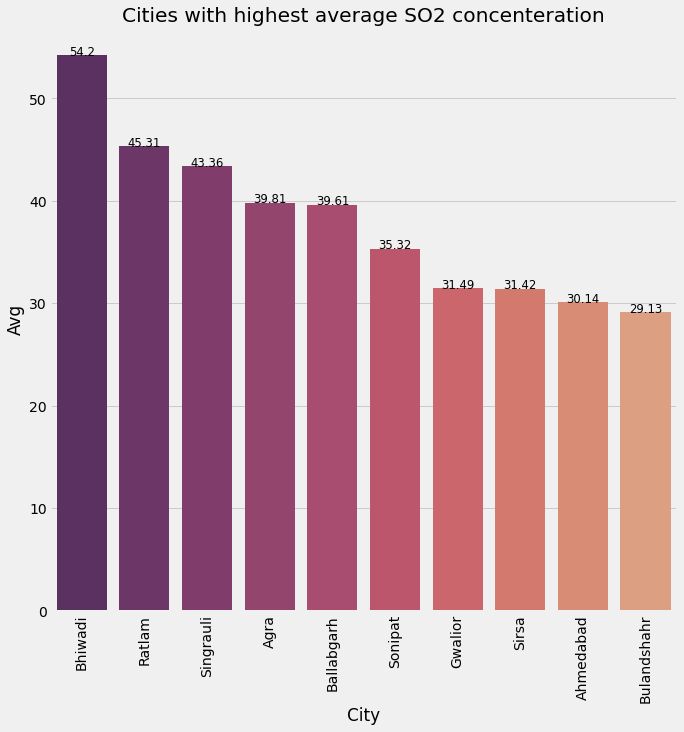

In [23]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average SO2 concenteration')
plt.xticks(rotation = 90)
plt.show()

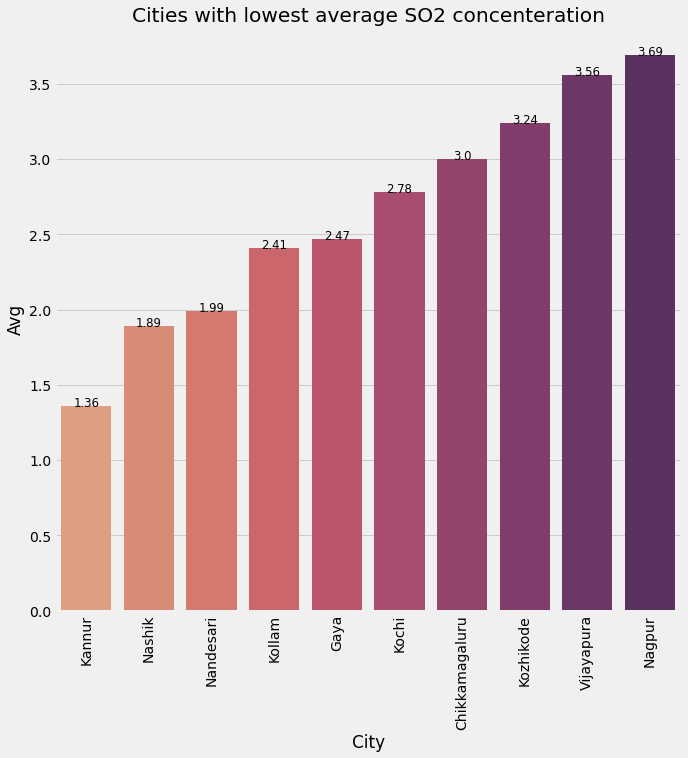

In [24]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average SO2 concenteration')
plt.xticks(rotation = 90)
plt.show()

## DELHI

In [25]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,7.55,15.59,29.21
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,7.86,15.59,29.48
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,7.69,15.83,28.97
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,7.48,15.90,30.07
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,7.36,16.07,30.75


In [26]:
delhi.describe()

,Month,Hour,Day,SO2_min,SO2_avg,SO2_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,9.876367,18.587900,34.152000
std,0.370287,5.458002,1.871871,1.423233,3.029979,8.442724
min,9.000000,0.000000,0.000000,7.070000,13.460000,19.250000
25%,10.000000,9.000000,1.000000,8.680000,15.922500,27.345000
50%,10.000000,13.000000,2.000000,10.015000,19.390000,35.210000
75%,10.000000,17.000000,4.000000,11.017500,20.682500,40.770000
max,10.000000,23.000000,6.000000,13.550000,25.450000,51.960000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='SO2_avg'>

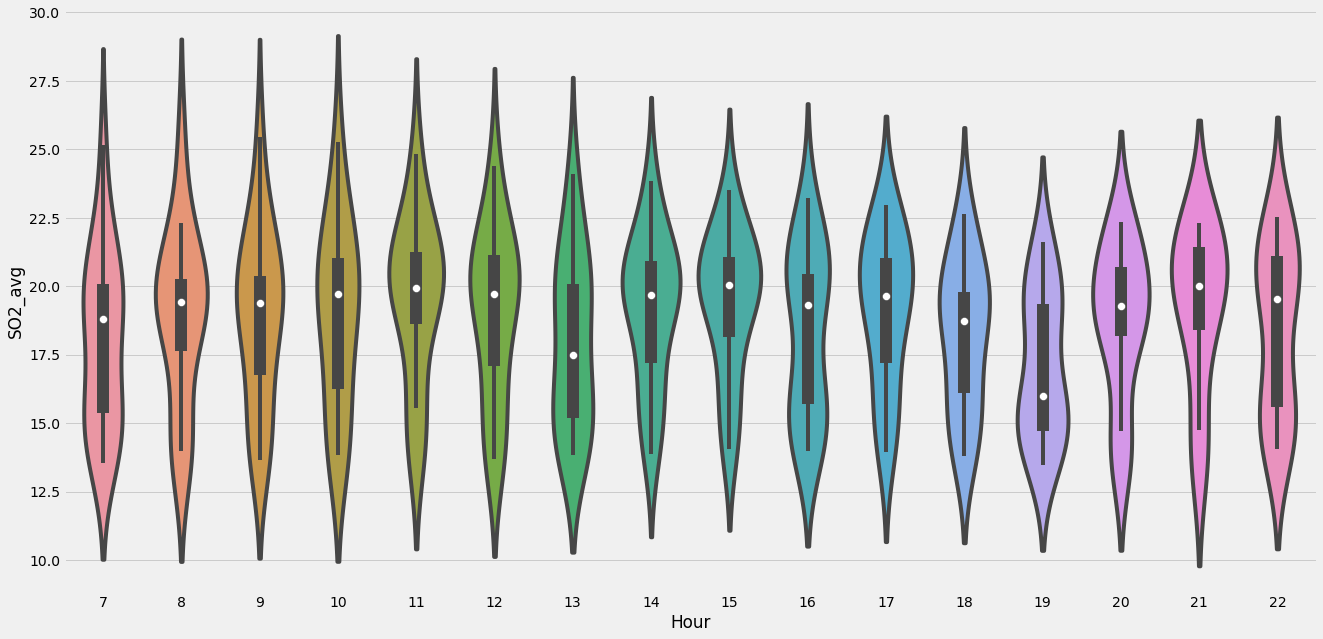

In [27]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'SO2_avg',x = 'Hour',data = delhi)

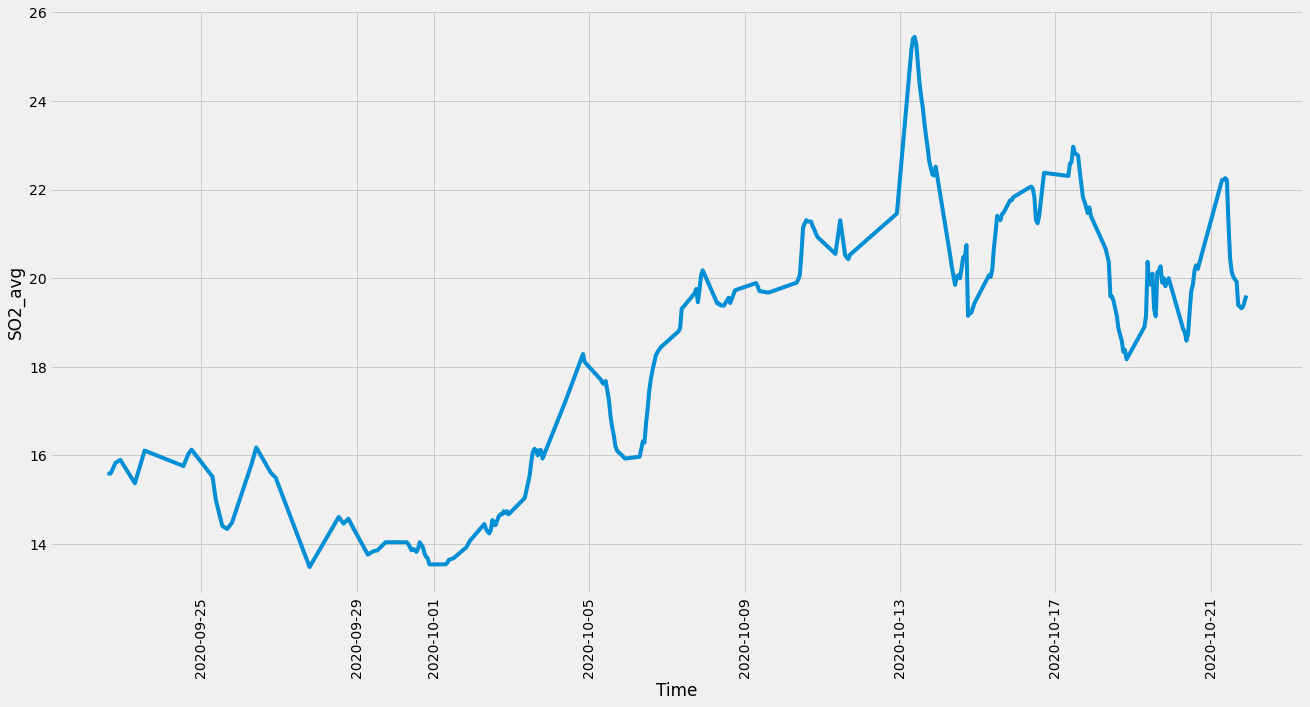

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'SO2_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

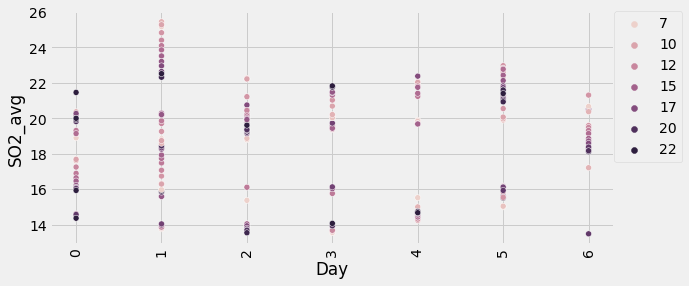

In [29]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'SO2_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

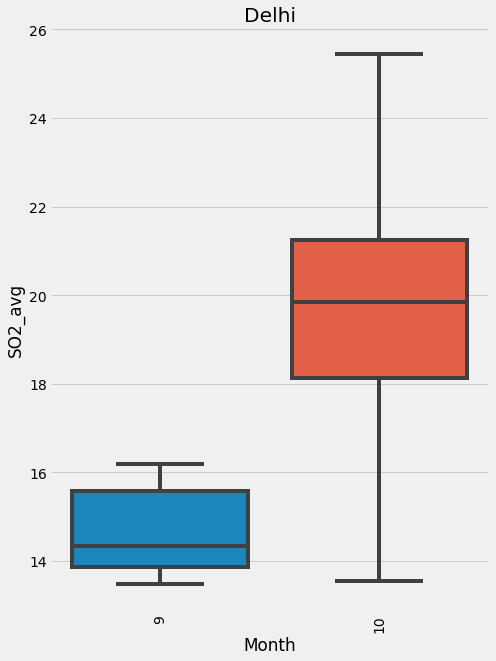

In [30]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'SO2_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [31]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

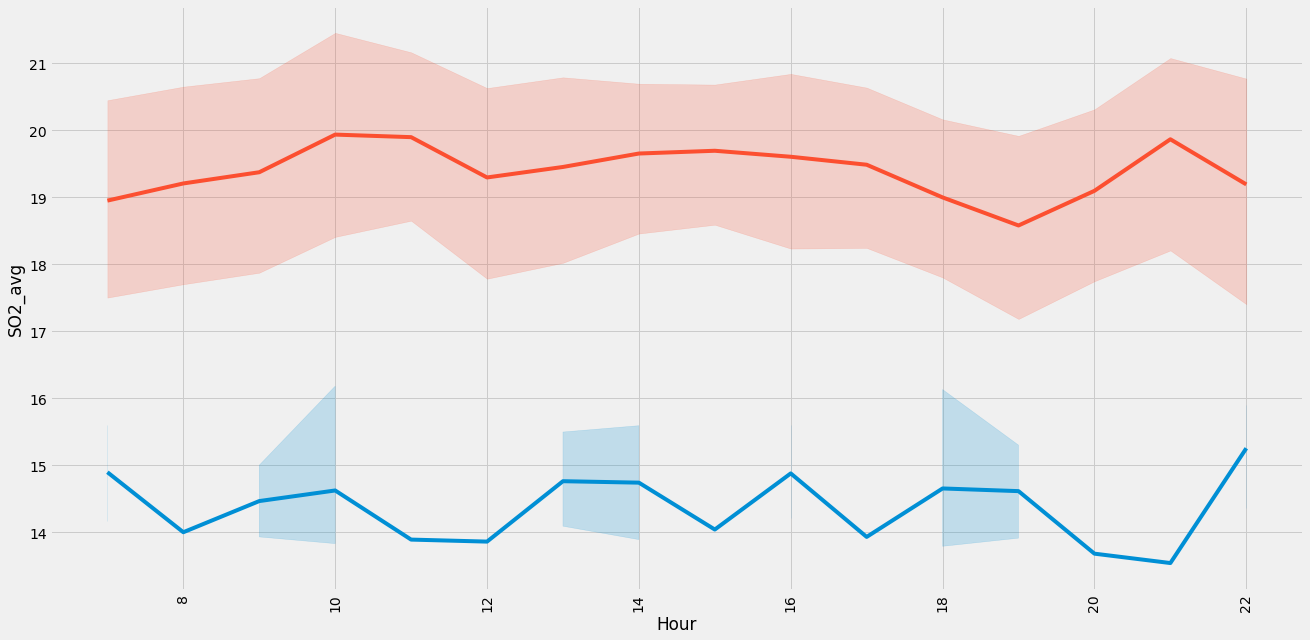

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'SO2_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'SO2_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

### Mumbai

In [33]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,11.43,17.57,31.00
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,11.43,17.14,30.86
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,11.57,16.71,30.86
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,11.29,16.14,30.86
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,12.00,16.50,34.67


In [34]:
mum.describe()

,Month,Hour,Day,SO2_min,SO2_avg,SO2_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,10.689600,14.915100,21.618767
std,0.370287,5.458002,1.871871,2.231676,2.742788,6.405140
min,9.000000,0.000000,0.000000,7.380000,10.000000,12.000000
25%,10.000000,9.000000,1.000000,8.750000,12.780000,17.170000
50%,10.000000,13.000000,2.000000,10.250000,14.000000,19.500000
75%,10.000000,17.000000,4.000000,13.000000,16.872500,23.750000
max,10.000000,23.000000,6.000000,15.860000,21.250000,38.000000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='SO2_avg'>

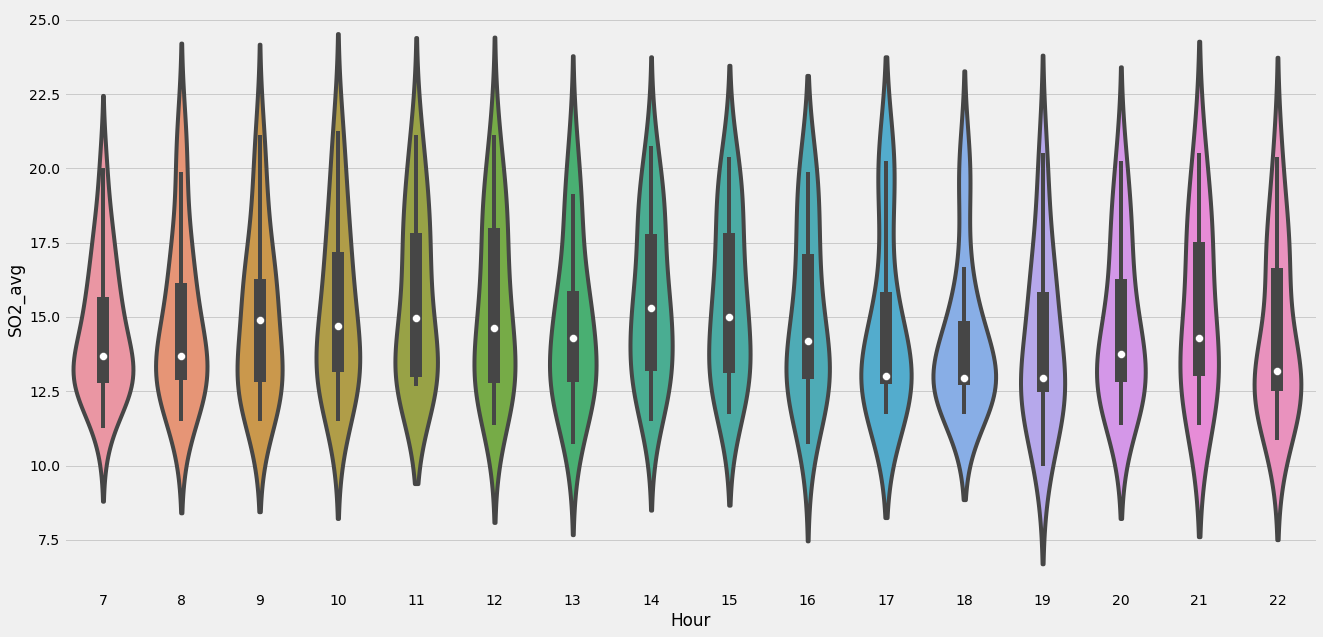

In [35]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'SO2_avg',x = 'Hour',data = mum)

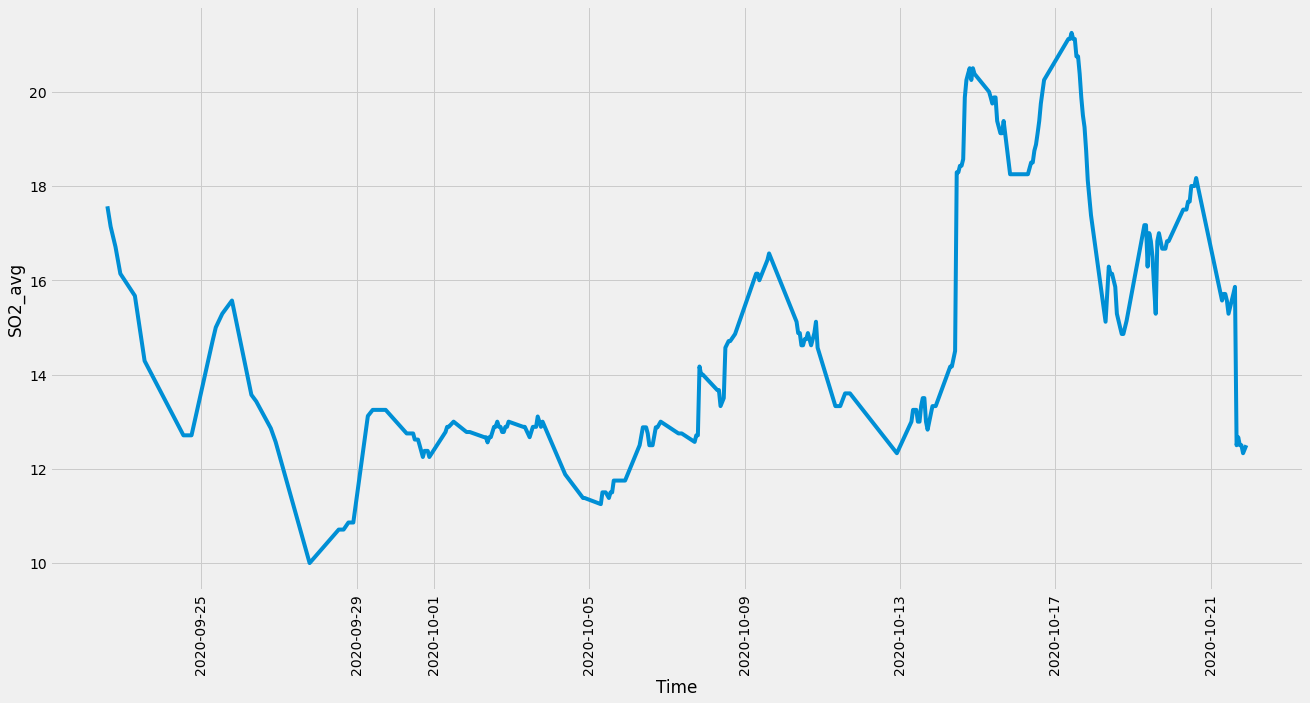

In [36]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'SO2_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

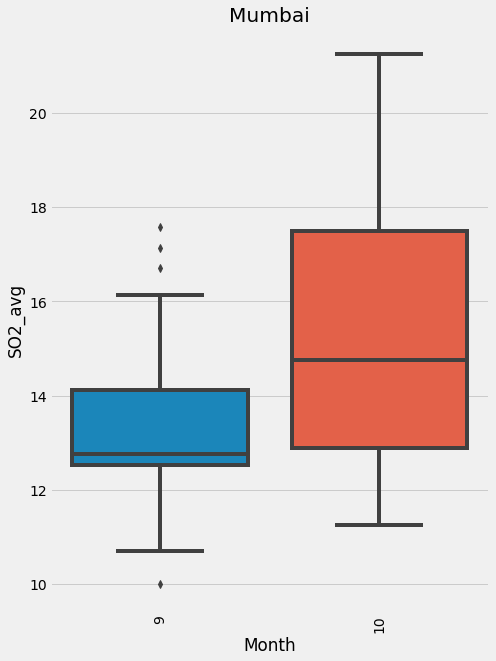

In [37]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'SO2_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

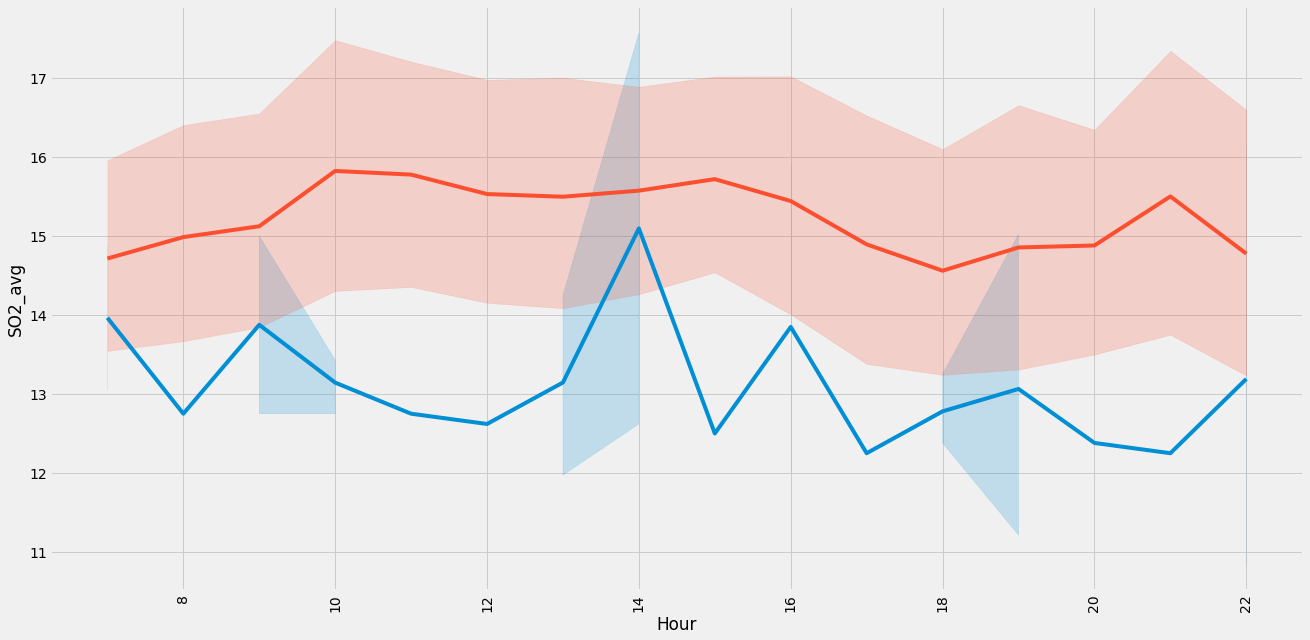

In [38]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'SO2_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'SO2_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()

### Singrauli

In [39]:
sin = df_2.loc[df_2.City == 'Singrauli'].copy()
sin = sin.reset_index(drop = True)
sin = sin.round(2)
sin.head()

,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Singrauli,"[24.1974432, 82.6661453]",2020-09-22 14:00:00,9,14,22-09-2020,1,25.0,54.0,104.0
1,Singrauli,"[24.1974432, 82.6661453]",2020-09-22 16:00:00,9,16,22-09-2020,1,25.0,53.0,77.0
2,Singrauli,"[24.1974432, 82.6661453]",2020-09-22 19:00:00,9,19,22-09-2020,1,25.0,48.0,74.0
3,Singrauli,"[24.1974432, 82.6661453]",2020-09-24 13:00:00,9,13,24-09-2020,3,6.0,22.0,28.0
4,Singrauli,"[24.1974432, 82.6661453]",2020-09-24 16:00:00,9,16,24-09-2020,3,6.0,20.0,26.0


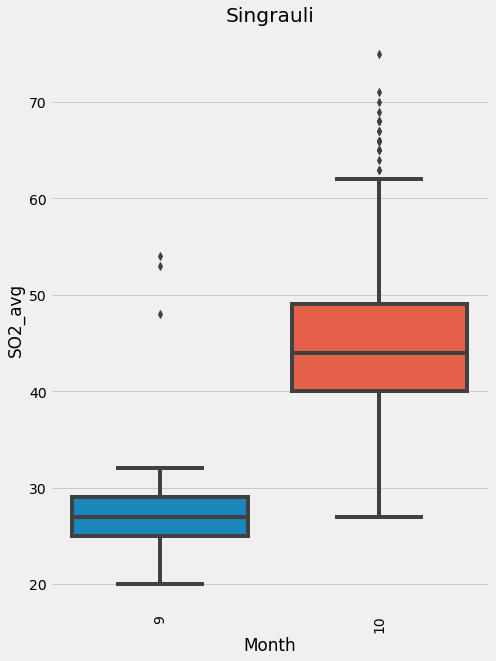

In [40]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'SO2_avg',x = 'Month',data = sin)
plt.title('Singrauli')
plt.xticks(rotation = 90)
plt.show()

(261, 10)


<AxesSubplot:xlabel='Hour', ylabel='SO2_avg'>

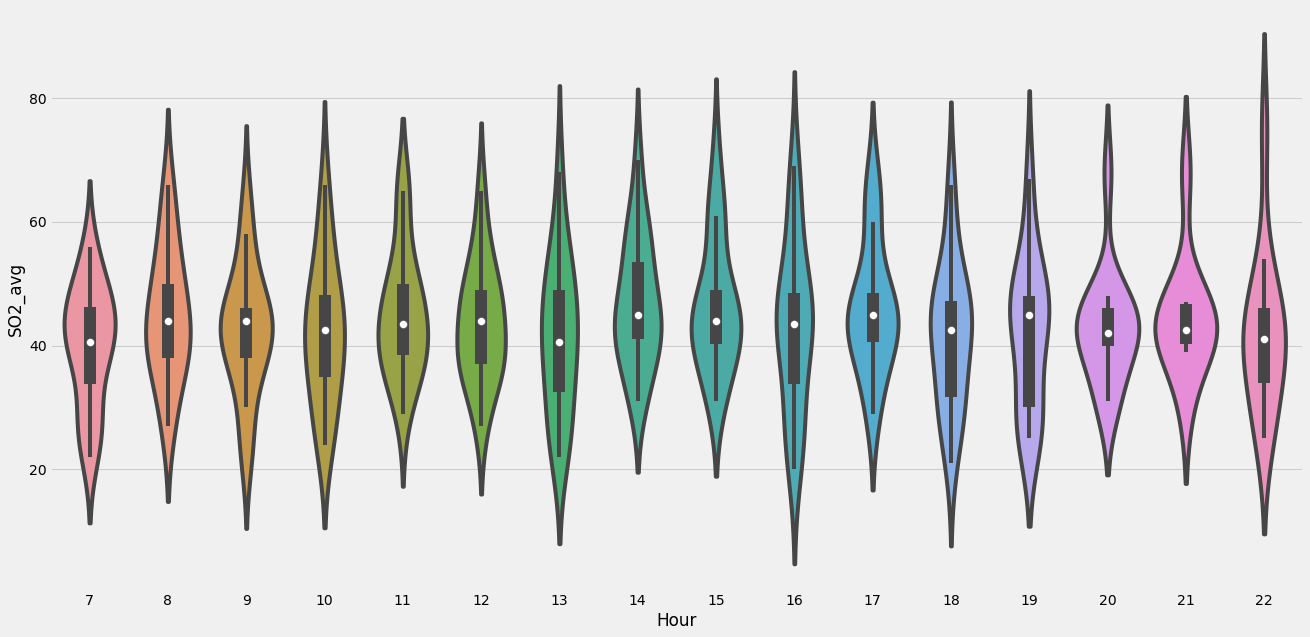

In [41]:
sin = sin[(sin.Hour >= 7) & (sin.Hour <= 22)]
print(sin.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'SO2_avg',x = 'Hour',data = sin)

In [42]:
delhi

,City,Coordinates,Time,Month,Hour,Date,Day,SO2_min,SO2_avg,SO2_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,7.55,15.59,29.21
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,7.86,15.59,29.48
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,7.69,15.83,28.97
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,7.48,15.90,30.07
5,Delhi,"[28.6273928, 77.1716954]",2020-09-23 07:00:00,9,7,23-09-2020,2,7.56,15.37,31.30
...,...,...,...,...,...,...,...,...,...,...
295,Delhi,"[28.6273928, 77.1716954]",2020-10-21 17:00:00,10,17,21-10-2020,2,8.25,19.39,35.75
296,Delhi,"[28.6273928, 77.1716954]",2020-10-21 18:00:00,10,18,21-10-2020,2,8.14,19.36,36.64
297,Delhi,"[28.6273928, 77.1716954]",2020-10-21 19:00:00,10,19,21-10-2020,2,8.04,19.32,36.79
298,Delhi,"[28.6273928, 77.1716954]",2020-10-21 20:00:00,10,20,21-10-2020,2,8.04,19.36,37.32


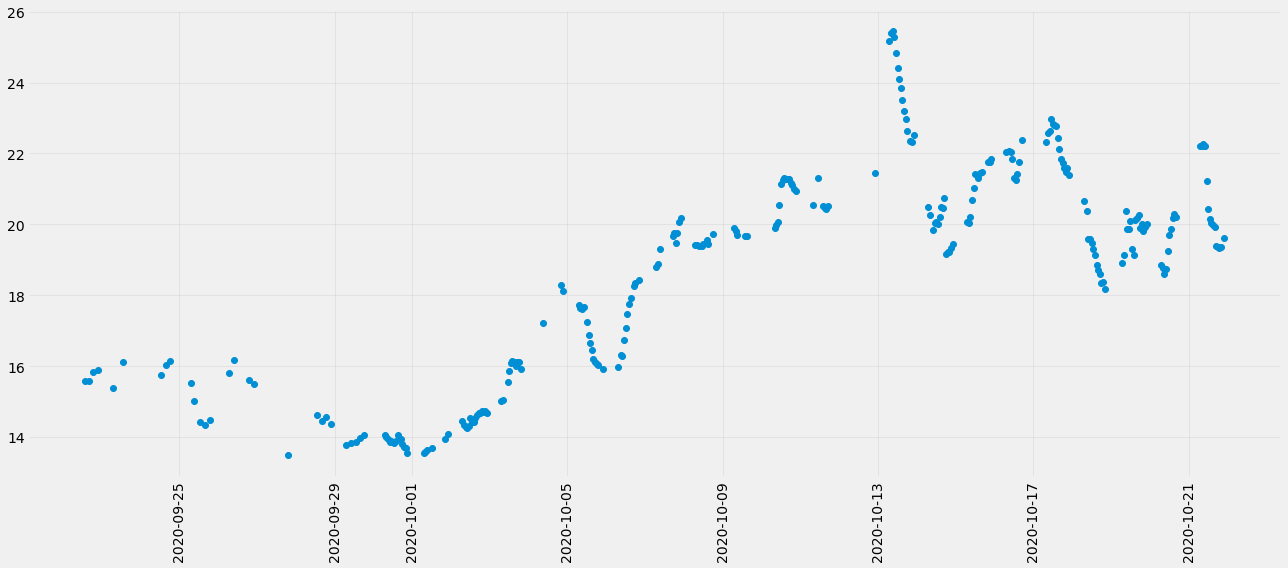

In [48]:
plt.figure(figsize=(20,8))
plt.plot_date(x = delhi['Time'],y = delhi['SO2_avg'])

plt.grid(linewidth=0.5,alpha=0.75)
plt.xticks(rotation = 90)
plt.show()

In [49]:
delhi.groupby(['Day'])['SO2_avg'].mean().reset_index()

,Day,SO2_avg
0,0,18.076471
1,1,19.454000
2,2,18.327091
3,3,18.592414
4,4,17.170286
5,5,19.598409
6,6,19.135652


In [50]:
mum.groupby(['Day'])['SO2_avg'].mean().reset_index()

,Day,SO2_avg
0,0,13.898235
1,1,14.438667
2,2,14.846000
3,3,15.841724
4,4,15.245143
5,5,15.903636
6,6,14.197391
